# Applied Statistics Submission 1

By:\
*Gargeya Sharma\
    220278025\
    MSc Artificial Intelligence*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib, io

from scipy.stats import weibull_min as weibull
from scipy.stats import gamma

### Question 1

**(1 mark)** Import the UN's Population Growth, Fertility and Mortality Indicators from 
>http://data.un.org/_Docs/SYB/CSV/SYB64_246_202110_Population%20Growth,%20Fertility%20and%20Mortality%20Indicators.csv

In [2]:
url = "http://data.un.org/_Docs/SYB/CSV/SYB64_246_202110_Population%20Growth,%20Fertility%20and%20Mortality%20Indicators.csv"
data = pd.read_csv(url, encoding = "ISO-8859-1", header=1)

In [3]:
data.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",41.0,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",248,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),68.9,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  4899 non-null   int64 
 1   Unnamed: 1           4899 non-null   object
 2   Year                 4899 non-null   int64 
 3   Series               4899 non-null   object
 4   Value                4899 non-null   object
 5   Footnotes            4263 non-null   object
 6   Source               4899 non-null   object
dtypes: int64(2), object(5)
memory usage: 268.0+ KB


In [5]:
data.columns = ['Region/Country/Area Index', 'Region/Country/Area', 'Year', 'Series', 'Value',
       'Footnotes', 'Source']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Region/Country/Area Index  4899 non-null   int64 
 1   Region/Country/Area        4899 non-null   object
 2   Year                       4899 non-null   int64 
 3   Series                     4899 non-null   object
 4   Value                      4899 non-null   object
 5   Footnotes                  4263 non-null   object
 6   Source                     4899 non-null   object
dtypes: int64(2), object(5)
memory usage: 268.0+ KB


### Question 2: 
**(2 marks)** Select the life expectancy data for both sexes (years) series for countries only (i.e. remove
region/continent-wise data). Format this data as a numpy array for processing. Print the size N of your
dataset.

In [7]:
data_c = data.iloc[624:].reset_index(drop=True)

In [8]:
data_c.head()

,Region/Country/Area Index,Region/Country/Area,Year,Series,Value,Footnotes,Source
0,4,Afghanistan,2010,Population annual rate of increase (percent),2.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
1,4,Afghanistan,2010,Total fertility rate (children per women),6.5,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
2,4,Afghanistan,2010,"Infant mortality for both sexes (per 1,000 liv...",72.2,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
3,4,Afghanistan,2010,"Maternal mortality ratio (deaths per 100,000 p...",954,NaN,"World Health Organization (WHO), the United Na..."
4,4,Afghanistan,2010,Life expectancy at birth for both sexes (years),59.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


In [9]:
data_life = data_c[data_c.loc[:,"Series"] == "Life expectancy at birth for both sexes (years)"]

In [10]:
data_life.head()

,Region/Country/Area Index,Region/Country/Area,Year,Series,Value,Footnotes,Source
4,4,Afghanistan,2010,Life expectancy at birth for both sexes (years),59.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
11,4,Afghanistan,2015,Life expectancy at birth for both sexes (years),62.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
18,4,Afghanistan,2020,Life expectancy at birth for both sexes (years),64.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
25,8,Albania,2010,Life expectancy at birth for both sexes (years),75.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
32,8,Albania,2015,Life expectancy at birth for both sexes (years),77.5,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


In [11]:
answer_2 = data_life["Value"].to_numpy().astype(float)

--- **Answer Below** ---

In [12]:
N = answer_2.size
print(N)

603


### Question 3
**(2 marks)** Plot a histogram of the data, add vertical lines for the mean and median of the data. Comment
briefly on what the values of the mean and the median tell us about the distribution of the data.


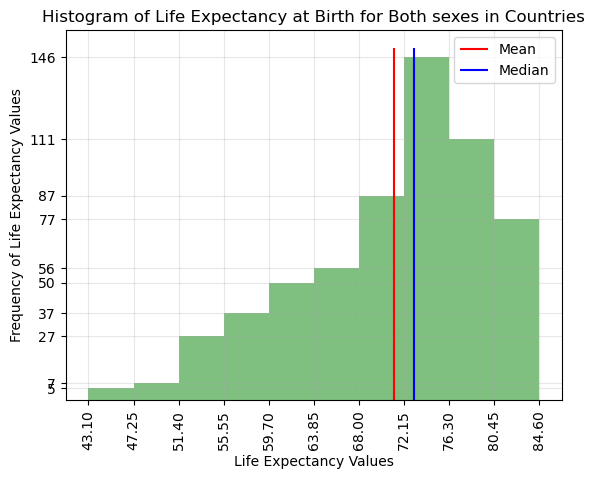

In [13]:
bins = plt.hist(answer_2, color="green", alpha=0.5)
plt.vlines(answer_2.mean(),ymin=0,ymax=150, label="Mean", colors="r")
plt.vlines(np.median(answer_2),ymin=0,ymax=150, label="Median", colors="b")
plt.xlabel("Life Expectancy Values")
plt.xticks(bins[1], rotation=90)
plt.ylabel("Frequency of Life Expectancy Values")
plt.yticks(bins[0])
plt.title("Histogram of Life Expectancy at Birth for Both sexes in Countries")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [14]:
print("Mean of the Data: ",np.mean(answer_2))
print("Median of the Data: ",np.median(answer_2))

Mean of the Data:  71.18275290215588
Median of the Data:  73.1


Mean and Median of the Life Expectancy at birth for both sexes data is **71.18** and **73.1**. Because the data distribution is left-skewed (Most of the Values lie towards the range of 68-80 rather than being uniformly distributed over the entire range, which gives a long tail on the left), the median is slightly shifted to right(greater value) than mean of the distribution. These two values are trying to give us the aggregate life expectancy of all the countries in their own different logic.

### Question 4
**(2 marks)** Compute and display the range, the interquartile range, and the standard deviation σ. Plot
a histogram of the data with vertical lines the rst quartile, the third quartile, and the mean +/− the
standard deviation (i.e. 4 vertical lines in total).

In [15]:
q25 = np.quantile(answer_2, 0.25)
q50 = np.quantile(answer_2, 0.50)
q75 = np.quantile(answer_2, 0.75)
std = np.std(answer_2)
print(f"The Range of the data: {answer_2.max()-answer_2.min() :0.2f} ranging from {answer_2.min()} - {answer_2.max()}\n")
print(f"The InterQuartile Range: \n25th: {q25}\n50th: {q50}\n75th: {q75}\n")
print(f"The Standard Deviation: {std :0.2f}")

The Range of the data: 41.50 ranging from 43.1 - 84.6

The InterQuartile Range: 
25th: 66.05
50th: 73.1
75th: 77.7

The Standard Deviation: 8.55


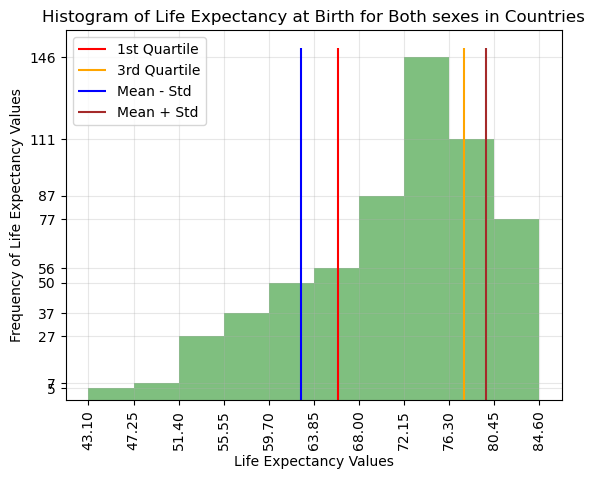

In [19]:
bins = plt.hist(answer_2, color="green", alpha=0.5)

plt.vlines(q25,ymin=0,ymax=150, label="1st Quartile", colors="r")
plt.vlines(q75,ymin=0,ymax=150, label="3rd Quartile", colors="orange")
plt.vlines(answer_2.mean()-std,ymin=0,ymax=150, label="Mean - Std", colors="b")
plt.vlines(answer_2.mean()+std,ymin=0,ymax=150, label="Mean + Std", colors="brown")

plt.xlabel("Life Expectancy Values")
plt.xticks(bins[1], rotation=90)
plt.ylabel("Frequency of Life Expectancy Values")
plt.yticks(bins[0])
plt.title("Histogram of Life Expectancy at Birth for Both sexes in Countries")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### Question 5
**(3 marks)** We covered several classes of distributions in the lecture (e.g. distributions on nite sets).
Based on your observations so far, which class and which distribution within this class do you think
would be suitable to model life expectancy? Briey justify your choice. Generate N samples from this
distribution. Adjust your parameters so that these samples are not too dissimilar to those from the life
expectancy data. Plot a histogram for this data together with vertical lines for the mean, rst, second
and third quartile.


#### Answer 5:

So according to what we saw in the class, I think my answer would be **gamma** distribution because of the presence and similarity of long tail in it as well as our life expectancy data distribution. Below, you can see both, calibrated gamma distribution from random samples similar to life expectancy data distribution and superimposition of its density curve with life expectancy data.

To calibrate the gamma distribution values and shift the right skewness of gamma distribution to left skewness, I used the *difference* between life expectancy distribution's maximum value and gamma distribution samples. And instead of moving in the positive x-axis with the gamma distribution's samples, We moved in the negative x-axis direction by subtracting those differences from life expectancy distribution's maximum value. 
>**Overall** in the distribution, values which have an euclidean distance of **'x'** with life expectancy data's maximum value are now transformed into values with **'-x'** distance from life expectancy data's maximum value. 

I also divided the difference mentioned above by the factor of 2, which is appoximately the value we get when we divide life expectancy data's maximum value with range of life expectancy data. This allows the distance values '-x' to be scaled down in order to reach the minimum value of the gamma distribution similar to life expectancy minimum value.

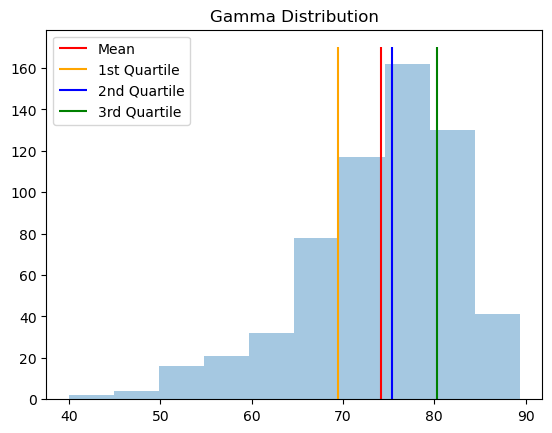

In [17]:
seed = 4
values = gamma.rvs(size=N,a=4, loc=np.mean(answer_2), scale=np.std(answer_2), random_state=seed)
values = answer_2.max() - ((values - answer_2.max())/2)
plt.hist(values, lw=2, alpha=0.4)
plt.vlines(values.mean(),ymin=0,ymax=170, label="Mean", colors="r")
plt.vlines(np.quantile(values, 0.25),ymin=0,ymax=170, label="1st Quartile", colors="orange")
plt.vlines(np.quantile(values, 0.50),ymin=0,ymax=170, label="2nd Quartile", colors="b")
plt.vlines(np.quantile(values, 0.75),ymin=0,ymax=170, label="3rd Quartile", colors="green")
plt.title('Gamma Distribution')
plt.legend()

Just to show direct superimposition of gamma distribution density curve on top of life expectancy data's histogram

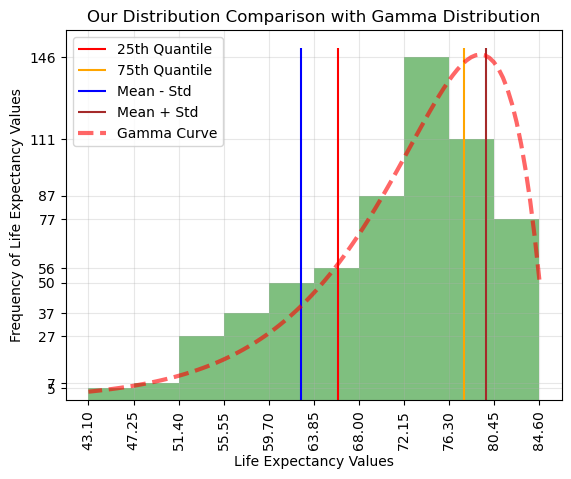

In [18]:
bins = plt.hist(answer_2, color="green", alpha=0.5)

plt.vlines(q25,ymin=0,ymax=150, label="25th Quantile", colors="r")
plt.vlines(q75,ymin=0,ymax=150, label="75th Quantile", colors="orange")
plt.vlines(answer_2.mean()-std,ymin=0,ymax=150, label="Mean - Std", colors="b")
plt.vlines(answer_2.mean()+std,ymin=0,ymax=150, label="Mean + Std", colors="brown")

plt.xlabel("Life Expectancy Values")
plt.xticks(bins[1], rotation=90)
plt.ylabel("Frequency of Life Expectancy Values")
plt.yticks(bins[0])
plt.title("Our Distribution Comparison with Gamma Distribution")
plt.grid(True, alpha=0.3)

## Comparing the Distribution with Gamma Distribution
c = 2
equalize_axis = np.linspace(answer_2.max(), answer_2.min(), 100)
gamma_x_values = np.linspace(gamma.ppf(0.01,c), gamma.ppf(0.99,c), 100)
plt.plot(equalize_axis, gamma.pdf(gamma_x_values,c)*400, 'r--', lw=3, alpha=0.6, label="Gamma Curve")## Multiply by 170 to just scale the Y-axis
plt.legend()
plt.show()

**--- END NOTEBOOK ---**